In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.optimize as optm

import os
import sys
import time
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import collections
import functools
import random

import optics_funs as of
import numerical_funs as nf
import matplotlib_funs as mpf
import LCT_funs as lctf
import general_funs as gef

import new_types as nt
import mutants

import finesse
import finesse.ligo
from finesse.cymath.homs import HGModes

import func_funs as ff
import graph_funs as grf
import finesse3_funs as f3f
import wolfram_funs as wlf

import networkx as nx
# import pygraphviz as pgv
import pydot

from IPython.display import Image, SVG

In [3]:
code = '''
m PRM
s lp1 PRM.p2 PR2.p1
bs PR2
s lp2 PR2.p2 PR3.p1
bs PR3

s ly1 PR3.p2 ITMY.p1 
m ITMY
s LY ITMY.p2 ETMY.p1
m ETMY
'''

kat = finesse.Model()
kat.parse(code)

In [4]:
G0 = kat.optical_network
G = grf.remove_orphans(G0)
G1 = grf.remove_sinks(G)
sources = grf.get_source_nodes(G1)
G1.remove_nodes_from([n for n in sources if n != 'PRM.p1.i'])

In [17]:
GN = grf.copy_graph(G1)
mapping = {n:i for i,n in enumerate(G1.nodes)}
GN = nx.relabel_nodes(GN, mapping)

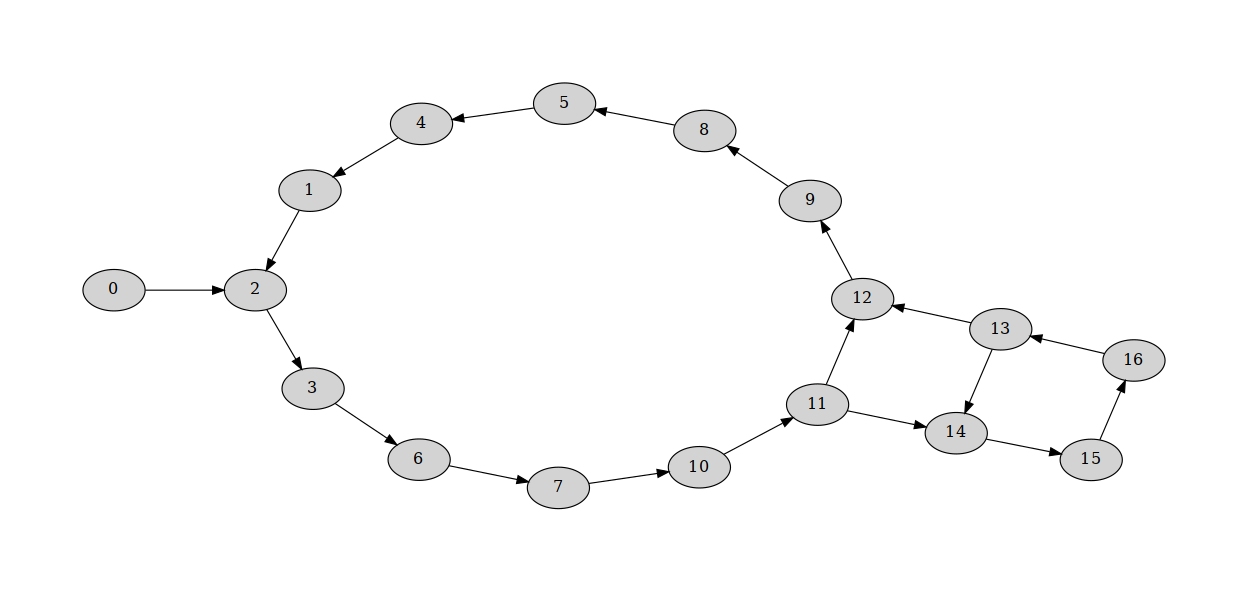

In [18]:
grf.drawing.graphviz_draw(GN, scale=1.3, ratio=1.4, format='png')

In [62]:
GN2 = nx.MultiDiGraph(GN)
grf.annotate_paths_to_graph(GN2, inplace=True)
nodes = [3,6,7,10,11,12,9,8,5,4,1] + [15,16,13]

for n in nodes:
    grf.absorb_node_multigraph(GN2, n, inplace=True, keep_node=True)
    
GN3 = grf.remove_sinks(GN2)

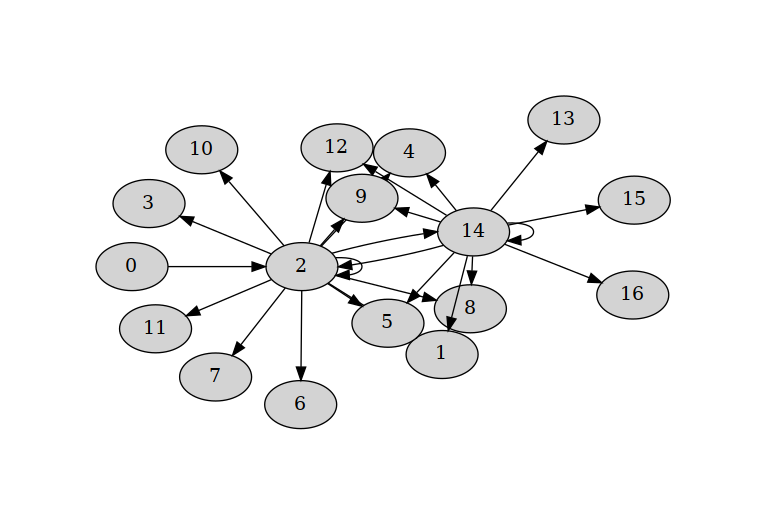

In [66]:
grf.drawing.graphviz_draw(GN2, scale=1.3, ratio=1.4, format='png')

In [58]:
GN2 = nx.MultiDiGraph(GN)
grf.annotate_paths_to_graph(GN2, inplace=True)
nodes = list(GN2.nodes)
random.shuffle(nodes)
print(nodes)

for n in nodes:
    grf.absorb_node_multigraph(GN2, n, residual_nodes=[0,2,14], inplace=True, keep_node=True)
    
GN3 = grf.remove_sinks(GN2)

[8, 7, 1, 0, 3, 4, 11, 13, 16, 15, 9, 10, 2, 5, 12, 6, 14]


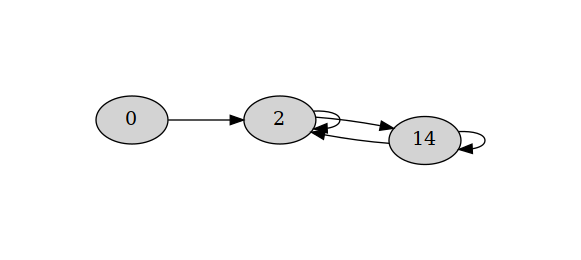

In [59]:
grf.drawing.graphviz_draw(GN3, scale=1.3, ratio=1.4, format='png')